This case study is based on the famous Boston housing data. It contains the details of 506 houses in the Boston city.

Your task is to create a machine learning model which can predict the average price of house based on its characteristics.

In the below case study I will discuss the step by step approach to create a Machine Learning predictive model in such scenarios.

# Reading the data into python

This is one of the most important steps in machine learning!We must understand the data and domain well before trying to apply any machine learning algorithm.
The dataset is stored in a file named "BostonData.csv," which contains details of 506 houses from the Boston city.

# Data Description

The business meaning of each column in the data is as follows:

- **CRIM**: Per capita crime rate by town
- **ZN**: Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS**: Proportion of non-retail business acres per town.
- **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- **NOX**: Nitric oxides concentration (parts per 10 million)
- **RM**: Average number of rooms per dwelling
- **AGE**: Proportion of owner-occupied units built prior to 1940
- **DIS**: Weighted distances to five Boston employment centers
- **RAD**: Index of accessibility to radial highways
- **TAX**: Full-value property-tax rate per $10,000
- **PTRATIO**: Pupil/teacher ratio by town
- **B**: $1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- **LSTAT**: % lower status of the population
- **MEDV**: Median value of owner-occupied homes in $1000's

Understanding the meaning of each column is essential for further analysis and modeling.

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
import numpy as np
import pandas as pd
BostonHousingData=pd.read_csv(filepath_or_buffer='C:/Users/HP/OneDrive/Desktop/IVY PYTHON Assignment/Python IVY Feb-2024/Python Datasets/Regression Datasets/BostonHousingData.csv',sep=',',encoding='latin1')
print('Shape before deleting duplicate values:',BostonHousingData.shape)
# Removing duplicate rows if any
BostonHousingData=BostonHousingData.drop_duplicates()
print('Shape after deleting duplicate values:',BostonHousingData.shape)
# Printing sample Data
# Start observing the Quantitaive/Categorical/Qualitative Variables
BostonHousingData.head(10)

Shape before deleting duplicate values: (506, 14)
Shape after deleting duplicate values: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


# Defining the problem statement

Create a ML model which can predict the median value of owner-occupied homes (in $1000s) in various suburbs of Boston based on various features. 

- **TargetVariable:**  MEDV
- **Predictors:**  CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT

# Determining the type of Machine Learning

Based on the problem statement you can understand that we need to create a supervised ML Regression model, as the target variable is Continuous

# Looking at the distribution of Target variable

<Axes: >

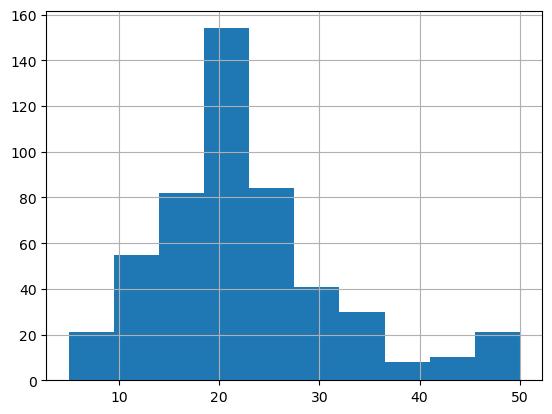

In [4]:
%matplotlib inline
BostonHousingData['MEDV'].hist()

- The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each type of values to learn from.

# Basic Data Exploration

In [5]:
# Looking at the sample rows in the data
BostonHousingData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
# Observing the summarized information of data
BostonHousingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
# Looking at the descriptive statistics of the data
BostonHousingData.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
# Finging unique values for each column
BostonHousingData.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

# Basic Data Exploration Results

The selected columns in this step are not final, further study will be done and then a final list will be created.

- **CRIM**: Continuous. Selected.
- **ZN**: Continuous. Selected.
- **INDUS**: Continuous. Selected.
- **CHAS**: Categorical. Selected.
- **NOX**: Continuous. Selected.
- **RM**: Continuous. Selected.
- **AGE**: Continuous. Selected.
- **DIS**: Continuous. Selected.
- **RAD**: Categorical. Selected.
- **TAX**: Continuous. Selected.
- **PTRATIO**: Continuous. Selected.
- **B**: Continuous. Selected.
- **LSTAT**: Continuous. Selected.
- **MEDV**: Continuous. Selected. (This is the Target Variable!)

# Removing useless columns from the data
There are no qualitative variables in the data

# Visual Exploratory Data Analysis
- **Categorical variables:**  Bar plot
- **Continuous variables:**  Histogram

## Visualize distribution of all the Categorical Predictor variables in the data using bar plots

Based on the Basic Data Exploration above, we have spotted two categorical predictors in the data

**Categorical Predictors:**

'CHAS', 'RAD'

We use bar charts to see how the data is distributed for these categorical columns.

In [9]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData,ColsToPlot):
    %matplotlib inline
    import matplotlib.pyplot as plt
    # Generating multiple subplots
    fig,subPlot=plt.subplots(nrows=1,ncols=len(ColsToPlot),figsize=(20,5))
    fig.suptitle('Bar Charts of:' + str(ColsToPlot))
    for ColName, plotNumber in zip(ColsToPlot,range(len(ColsToPlot))):
        inpData.groupby(ColName).size().plot(kind='bar',ax=subPlot[plotNumber])   

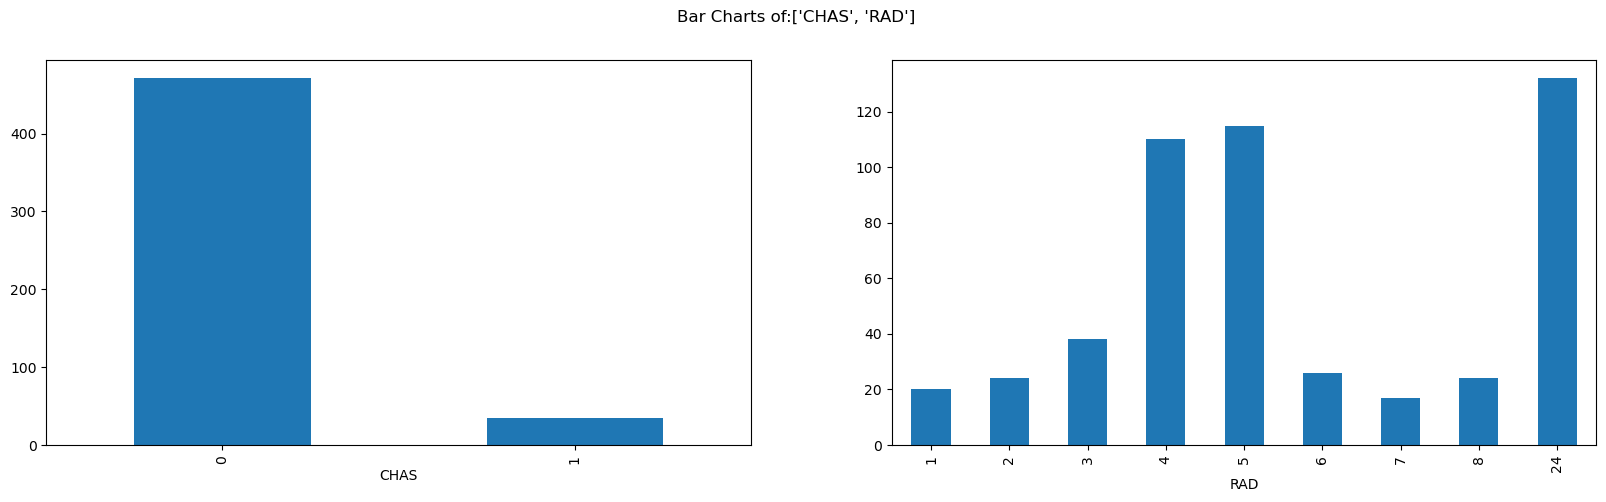

In [11]:
# Calling the function
PlotBarCharts(inpData=BostonHousingData,ColsToPlot=['CHAS', 'RAD'])

# Bar Charts Interpretation

In this data, "CHAS" is skewed. There is just one bar which is dominating and other one have very less rows. Such columns may not be correlated with the target variable because there is no information to learn. The algorithms cannot find any rule like when the value is this then the target variable is that.

**Selected Categorical Variables:** Both the categorical variables are selected for further analysis.

'CHAS', 'RAD'

## Visualize distribution of all the Continuous Predictor variables in the data using histograms


Based on the Basic Data Exploration, there are eleven continuous predictor variables 'CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', and 'LSTAT'.

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>],
       [<Axes: title={'center': 'DIS'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>],
       [<Axes: title={'center': 'B'}>, <Axes: title={'center': 'LSTAT'}>,
        <Axes: >]], dtype=object)

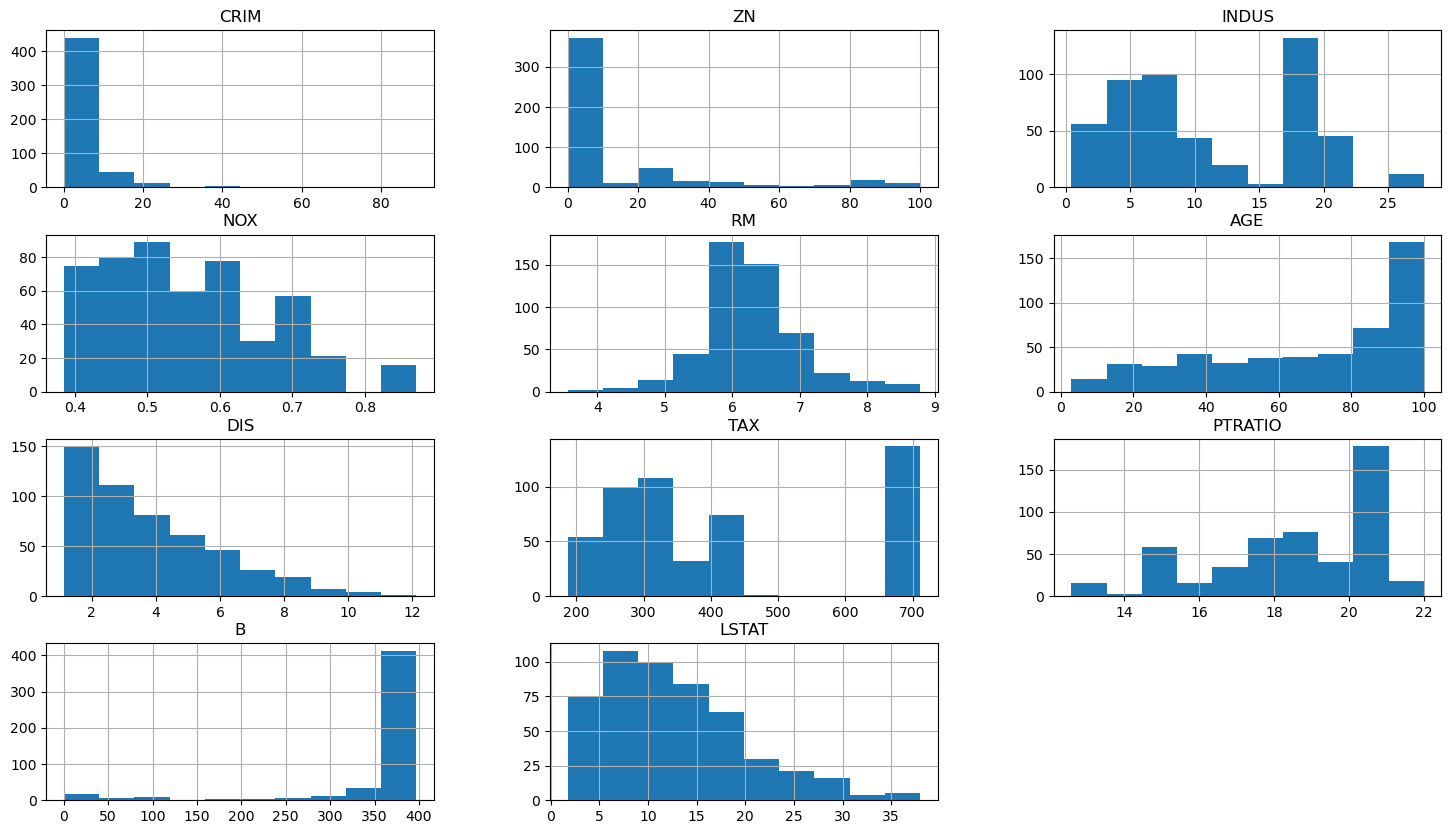

In [13]:
# Plotting histograms of multiple columns together
BostonHousingData.hist(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
                 'PTRATIO', 'B', 'LSTAT'], figsize=(18,10))

# Histogram Interpretation

**Selected Continuous Variables:**

1. **CRIM**: Selected. Outliers seen beyond 40, need to treat them.
2. **ZN**: Selected. The distribution is good.
3. **INDUS**: Selected. The distribution is good.
4. **NOX**: Selected. The distribution is good.
5. **RM**: Selected. The distribution is good.
6. **AGE**: Selected. The distribution is good.
7. **DIS**: Selected. The distribution is good.
8. **TAX**: Selected. The distribution is good.
9. **PTRATIO**: Selected. The distribution is good.
10. **B**: Selected. The distribution is good.
11. **LSTAT**: Selected. The distribution is good.


# Outlier Treatment

## Replacing outliers for 'CRIM'

In [17]:
# Finding nearest values to 60 mark
BostonHousingData['CRIM'][BostonHousingData['CRIM']<60].sort_values(ascending=False)

410    51.13580
414    45.74610
404    41.52920
398    38.35180
427    37.66190
         ...   
55      0.01311
341     0.01301
285     0.01096
284     0.00906
0       0.00632
Name: CRIM, Length: 503, dtype: float64

- Above result shows the nearest logical value is 51.13, hence, replacing any value above 60 with it.

In [18]:
# Replacing outliers with nearest possibe value
BostonHousingData['CRIM'][BostonHousingData['CRIM']>60] =51.13

# Visualizing distribution after outlier treatment
The distribution has improved after the outlier treatment. There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable

array([[<Axes: title={'center': 'CRIM'}>]], dtype=object)

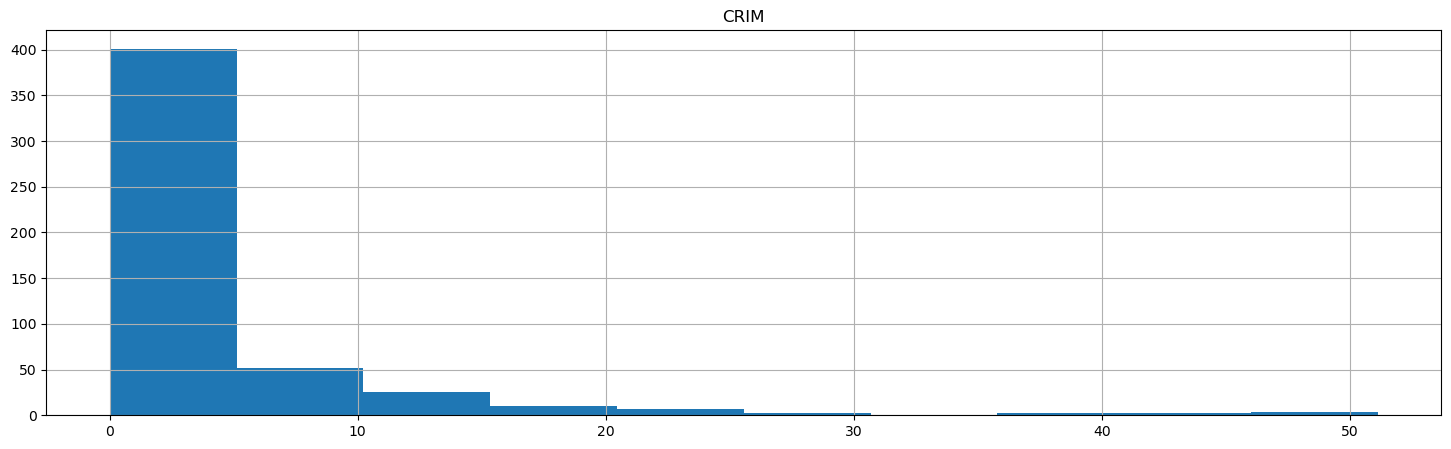

In [19]:
BostonHousingData.hist(['CRIM'], figsize=(18,5))

## Missing Value Treatment

In [20]:
# Finding how many missing values are there for each column
BostonHousingData.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

- No missing values in this data!!

# Feature Selection(Bi-Variate Analysis)

## Relationship exploration: Continuous Vs Continuous -- Scatter Charts

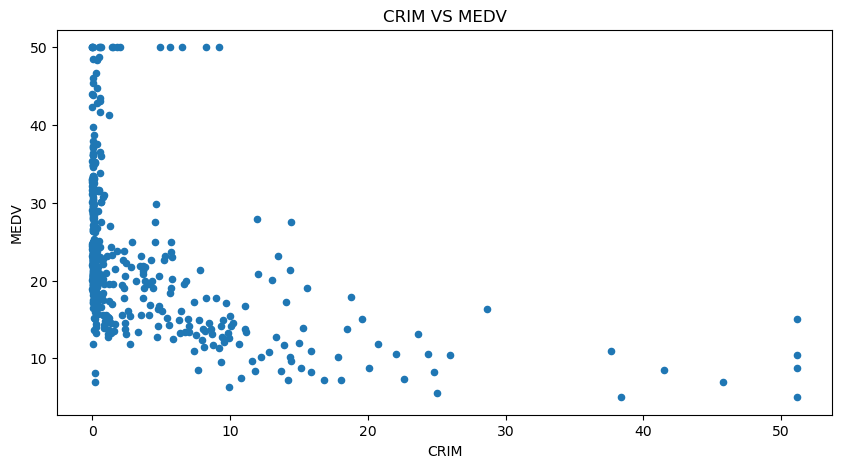

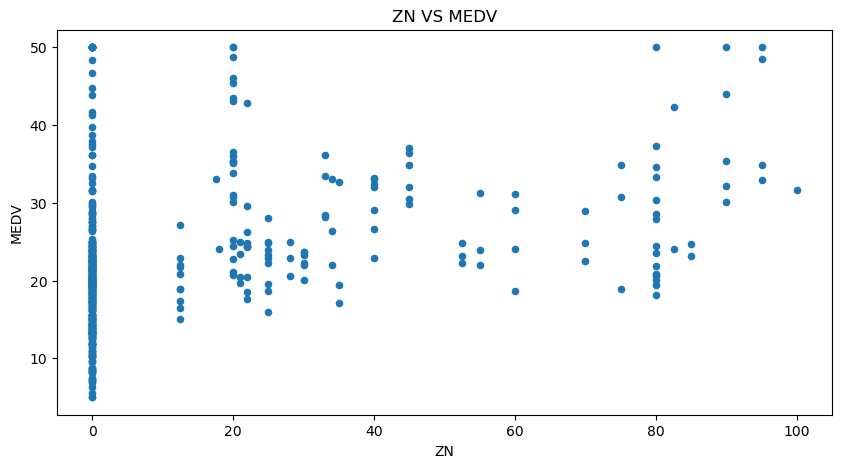

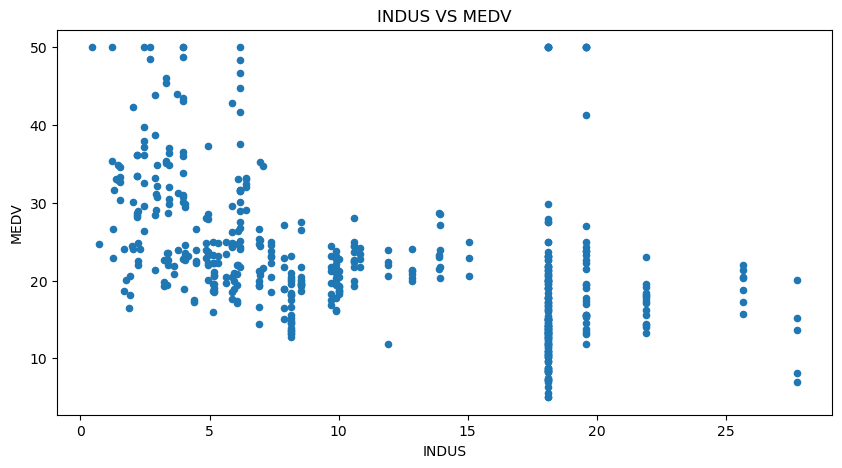

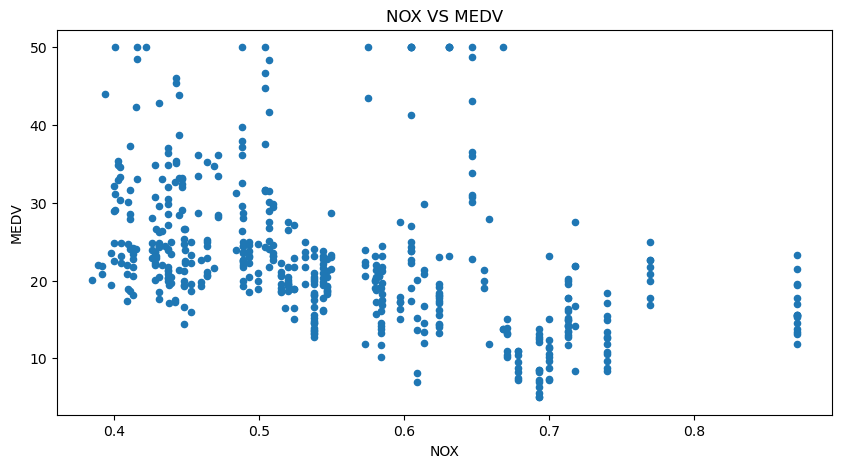

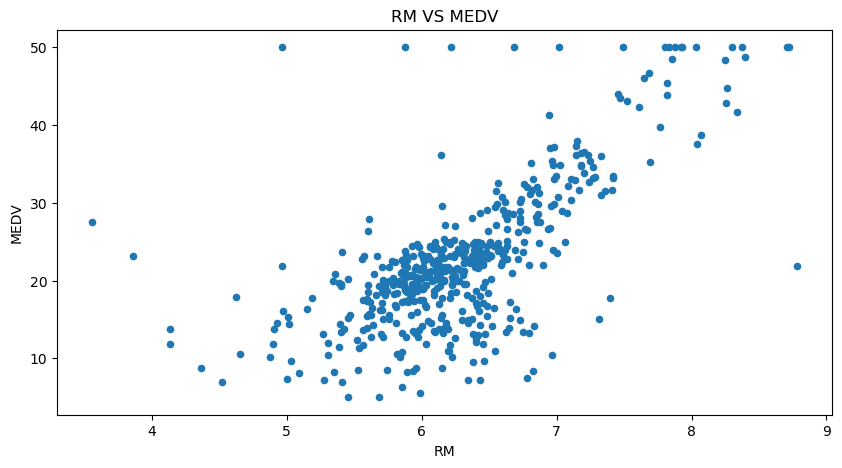

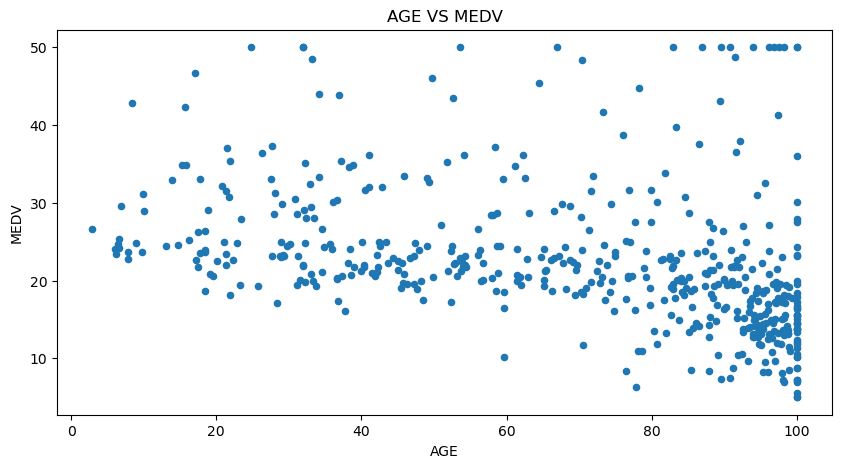

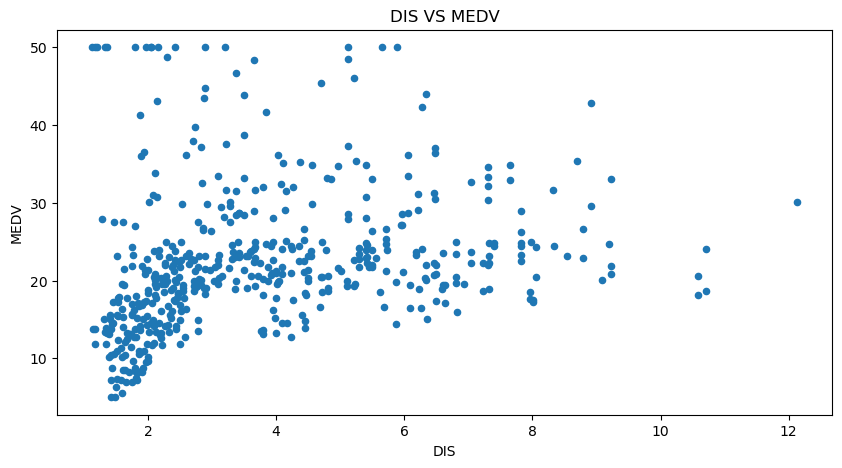

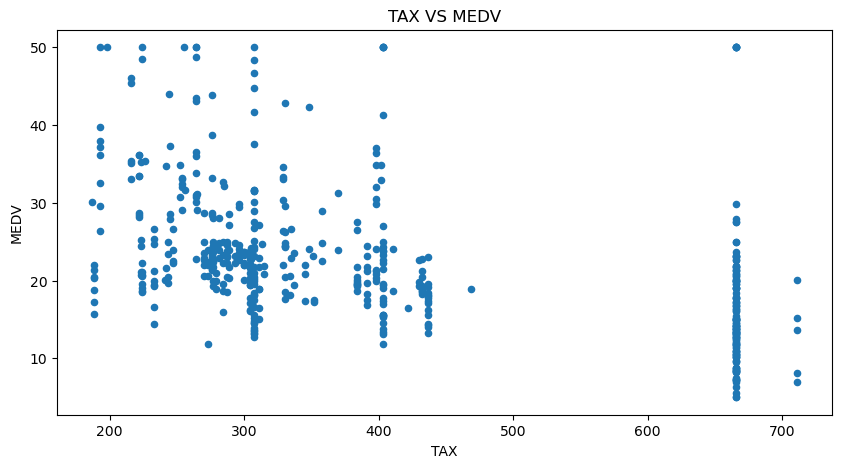

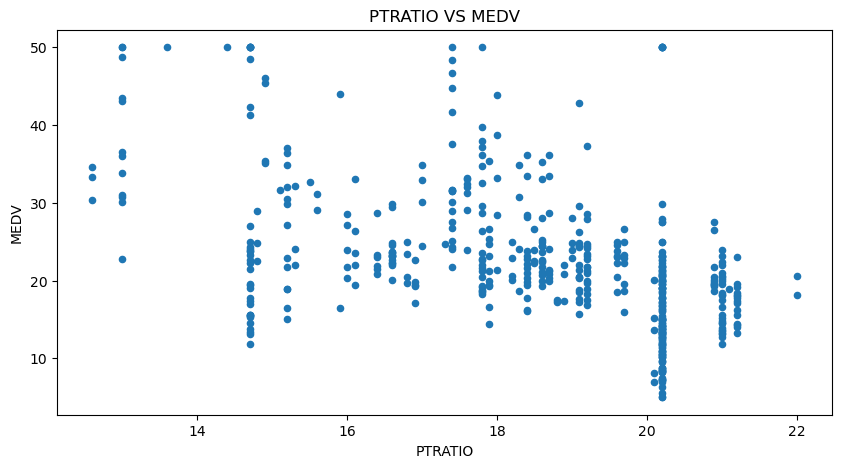

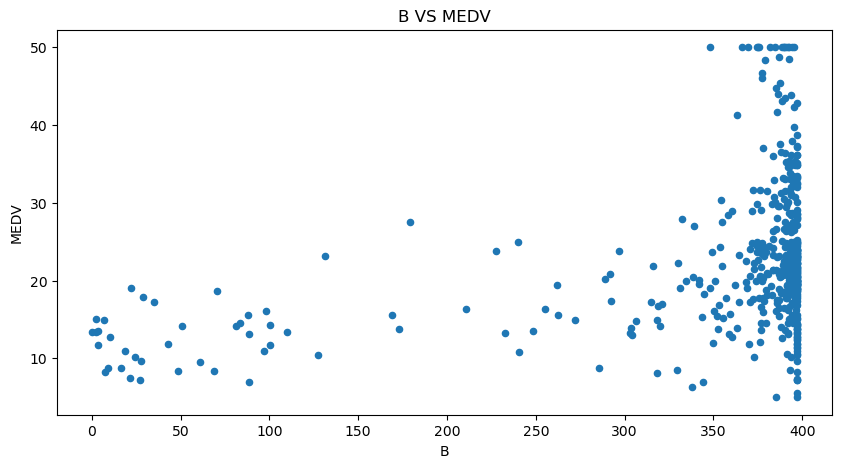

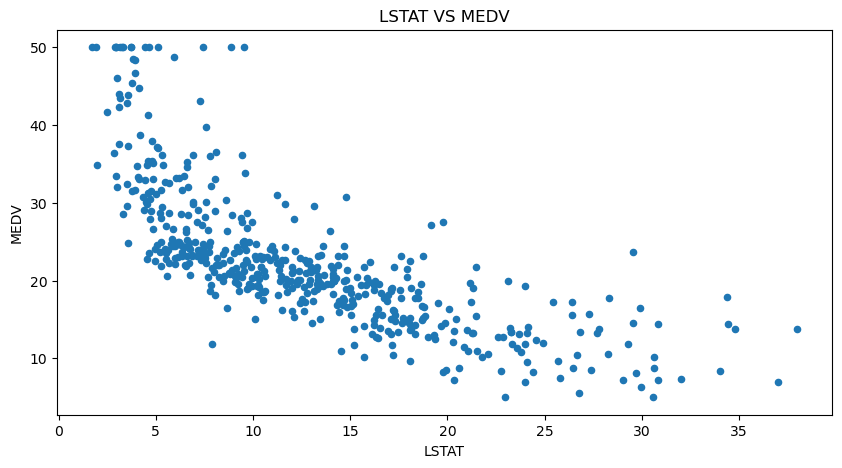

In [21]:
ContinuousCols=['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
                 'PTRATIO', 'B', 'LSTAT']
# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    BostonHousingData.plot.scatter(x=predictor, y='MEDV', figsize=(10,5), title=predictor+" VS "+ 'MEDV')

# Scatter charts interpretation
Based on this chart you can get a good idea about the predictor, if it will be useful or not. You confirm this by looking at the correlation value

## Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

In [27]:
ContinuousCols=['MEDV','CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
                 'PTRATIO', 'B', 'LSTAT']
# Creating the correlation matrix
CorrelationData=BostonHousingData[ContinuousCols].corr()
CorrelationData

,MEDV,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
MEDV,1.000000,-0.419265,0.360445,-0.483725,-0.427321,0.695360,-0.376955,0.249929,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.419265,1.000000,-0.222332,0.450375,0.466020,-0.257310,0.388784,-0.417941,0.643998,0.319489,-0.429858,0.508483
ZN,0.360445,-0.222332,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.450375,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.720760,0.383248,-0.356977,0.603800
NOX,-0.427321,0.466020,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.257310,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.376955,0.388784,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.417941,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.534432,-0.232471,0.291512,-0.496996
TAX,-0.468536,0.643998,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,1.000000,0.460853,-0.441808,0.543993
PTRATIO,-0.507787,0.319489,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.460853,1.000000,-0.177383,0.374044


In [28]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected like in this case
CorrelationData['MEDV'][abs(CorrelationData['MEDV']) > 0.5 ]

MEDV       1.000000
RM         0.695360
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

**Final selected Continuous columns:**

'RM', 'PTRATIO','LSTAT'

## Relationship exploration: Categorical Vs Continuous -- Box Plots¶

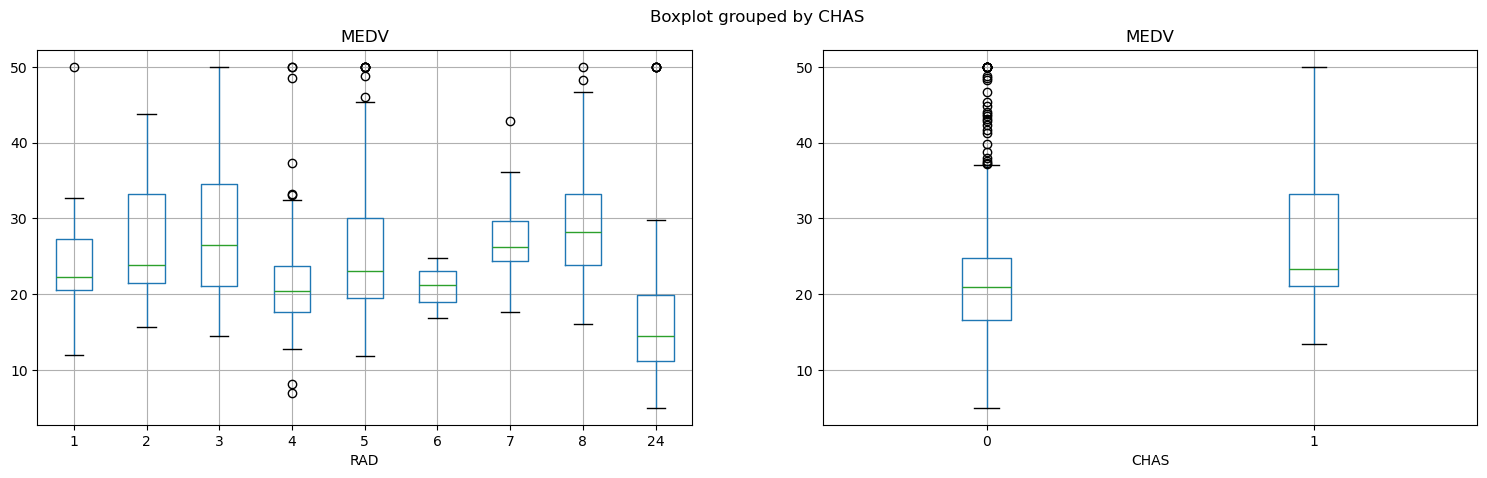

In [29]:
# Box plots for continuous Target Variable "MEDV" and Categorical predictors
CategoricalColsList=['RAD', 'CHAS']
import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))
# Creating box plots for each continuous predictor against the Target Variable "MEDV"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    BostonHousingData.boxplot(column='MEDV', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

# Box-Plots interpretation

We confirm this by looking at the results of ANOVA test below

## Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

In [30]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [31]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['RAD', 'CHAS']
FunctionAnova(inpData=BostonHousingData, 
              TargetVariable='MEDV', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

RAD is correlated with MEDV | P-Value: 3.1256493316010175e-24
CHAS is correlated with MEDV | P-Value: 7.390623170520815e-05


['RAD', 'CHAS']

**Final selected Categorical columns:**

'RAD', 'CHAS'

# Selecting final Columns For Machine learning

Based on the above tests, selecting the final columns for machine learning

In [32]:
SelectedColumns=['RM', 'PTRATIO','LSTAT','RAD', 'CHAS']

# Selecting final columns
DataForML=BostonHousingData[SelectedColumns]
DataForML.head()

,RM,PTRATIO,LSTAT,RAD,CHAS
0,6.575,15.3,4.98,1,0
1,6.421,17.8,9.14,2,0
2,7.185,17.8,4.03,2,0
3,6.998,18.7,2.94,3,0
4,7.147,18.7,5.33,3,0


In [33]:
import os
os.getcwd()

'C:\\Users\\HP\\Practice Folder\\Supervised ML Regression Model\\BostonHousingData'

In [34]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [35]:
# Reading a pickle file
import pandas as pd
DataForML=pd.read_pickle('DataForML.pkl')
DataForML.head()

,RM,PTRATIO,LSTAT,RAD,CHAS
0,6.575,15.3,4.98,1,0
1,6.421,17.8,9.14,2,0
2,7.185,17.8,4.03,2,0
3,6.998,18.7,2.94,3,0
4,7.147,18.7,5.33,3,0


In [36]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['MEDV']=BostonHousingData['MEDV']

# Printing sample rows
DataForML_Numeric.head()

,RM,PTRATIO,LSTAT,RAD,CHAS,MEDV
0,6.575,15.3,4.98,1,0,24.0
1,6.421,17.8,9.14,2,0,21.6
2,7.185,17.8,4.03,2,0,34.7
3,6.998,18.7,2.94,3,0,33.4
4,7.147,18.7,5.33,3,0,36.2


# Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [37]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['RM', 'PTRATIO', 'LSTAT', 'RAD', 'CHAS', 'MEDV'], dtype='object')

In [38]:
# Seperate Target Variable and Predictor Variable
TargetVariable='MEDV'
Predictors=['RM', 'PTRATIO','LSTAT','RAD', 'CHAS']

# Simple Linear Regression (only one predictor)
#Predictors=['Votes']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Polynomial Regression
# Uncomment below lines if you want to perform polynomial regression
#from sklearn.preprocessing import PolynomialFeatures
#poly = PolynomialFeatures(degree = 2, include_bias=False)
#X = poly.fit_transform(X)
#Predictors=poly.get_feature_names()

# Split the data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

# Quick check on the shapes of train and test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(354, 5)
(354,)
(152, 5)
(152,)


In [39]:
# Suppressing Scientific Notation in printing numpy arrays
np.set_printoptions(suppress=True)
X_train[0:10]

array([[ 6.145, 19.7  ,  6.86 ,  8.   ,  0.   ],
       [ 5.757, 20.2  , 10.11 , 24.   ,  0.   ],
       [ 6.75 , 20.2  ,  7.74 , 24.   ,  0.   ],
       [ 5.885, 18.9  ,  8.79 ,  4.   ,  0.   ],
       [ 6.77 , 17.9  ,  4.84 ,  3.   ,  0.   ],
       [ 6.417, 20.2  , 19.31 , 24.   ,  0.   ],
       [ 6.251, 20.2  , 14.19 , 24.   ,  0.   ],
       [ 5.874, 18.7  ,  9.1  ,  5.   ,  0.   ],
       [ 6.335, 21.2  , 16.96 ,  4.   ,  0.   ],
       [ 7.241, 15.5  ,  5.49 ,  1.   ,  0.   ]])

In [40]:
y_train[0:10]

array([23.3, 15. , 23.7, 20.9, 26.6, 13. , 19.9, 20.3, 18.1, 32.7])

# Multiple Linear Regression

In [41]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
prediction=LREG.predict(X_test)
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable, 'APE']].head())


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.6950534471577541

##### Model Validation and Accuracy Calculations ##########
      RM  PTRATIO  LSTAT   RAD  CHAS  MEDV  PredictedMEDV
0  6.127     20.2  11.48  24.0   1.0  22.7           24.0
1  7.107     12.6   8.61   2.0   0.0  30.3           33.0
2  5.399     17.9  30.81   3.0   0.0  14.4            8.0
3  6.749     20.2  17.44  24.0   0.0  13.4           20.0
4  5.713     20.2  14.76  24.0   0.0  20.1           16.0
   MEDV  PredictedMEDV        APE
0  22.7           24.0   5.726872
1  30.3           33.0   8.910891
2  14.4            8.0  44.444444
3  13.4           20.0  49.253731
4  20.1           16.0  20.398010
Mean Accuracy on test data: 78.14081812432404
Median Accuracy on test data: 86.10344827586206

Accuracy values for 10-fold Cross Validation:
 [88.78472351 90.01462311 82.93367348 82.14573469 86.66783537 88.63411206
 84.88621233 48.83600797 51.6418211  85.29449921]

Final Average Accuracy of the model: 78.98


In [42]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [43]:
TestingDataResults['MEDVAVG']=TestingDataResults['MEDV'].mean()
TestingDataResults.head()

,RM,PTRATIO,LSTAT,RAD,CHAS,MEDV,PredictedMEDV,APE,MEDVAVG
0,6.127,20.2,11.48,24.0,1.0,22.7,24.0,5.726872,23.001974
1,7.107,12.6,8.61,2.0,0.0,30.3,33.0,8.910891,23.001974
2,5.399,17.9,30.81,3.0,0.0,14.4,8.0,44.444444,23.001974
3,6.749,20.2,17.44,24.0,0.0,13.4,20.0,49.253731,23.001974
4,5.713,20.2,14.76,24.0,0.0,20.1,16.0,20.398010,23.001974


In [44]:
TestingDataResults.head()

,RM,PTRATIO,LSTAT,RAD,CHAS,MEDV,PredictedMEDV,APE,MEDVAVG
0,6.127,20.2,11.48,24.0,1.0,22.7,24.0,5.726872,23.001974
1,7.107,12.6,8.61,2.0,0.0,30.3,33.0,8.910891,23.001974
2,5.399,17.9,30.81,3.0,0.0,14.4,8.0,44.444444,23.001974
3,6.749,20.2,17.44,24.0,0.0,13.4,20.0,49.253731,23.001974
4,5.713,20.2,14.76,24.0,0.0,20.1,16.0,20.398010,23.001974


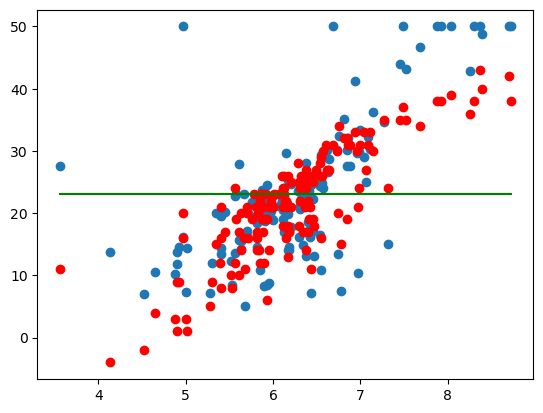

In [45]:
# Visualizing the line of best fit
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x=TestingDataResults['RM'] , y=TestingDataResults['MEDV'])
plt.scatter(TestingDataResults['RM'] ,TestingDataResults['PredictedMEDV'], color='red')
plt.plot(TestingDataResults['RM'] ,TestingDataResults['MEDVAVG'], color='green')

In [46]:
SelectedColumns=['RM', 'PTRATIO','LSTAT','RAD', 'CHAS']

In [47]:
# Looking at the coefficients for each column
LREG.coef_

array([ 4.52043096, -0.79889396, -0.58132336, -0.01707466,  3.6879737 ])

In [48]:
# Looking at the intercept
LREG.intercept_

15.697736939224036

# Decision Trees

DecisionTreeRegressor(max_depth=3)
R2 Value: 0.7925806437137347

##### Model Validation and Accuracy Calculations ##########
   MEDV  PredictedMEDV
0  22.7           21.0
1  30.3           33.0
2  14.4           19.0
3  13.4           14.0
4  20.1           14.0
Mean Accuracy on test data: 79.01220446085712
Median Accuracy on test data: 86.19287917017101

Accuracy values for 10-fold Cross Validation:
 [87.09996678 84.14599479 83.36462337 73.33004825 73.01897975]

Final Average Accuracy of the model: 80.19


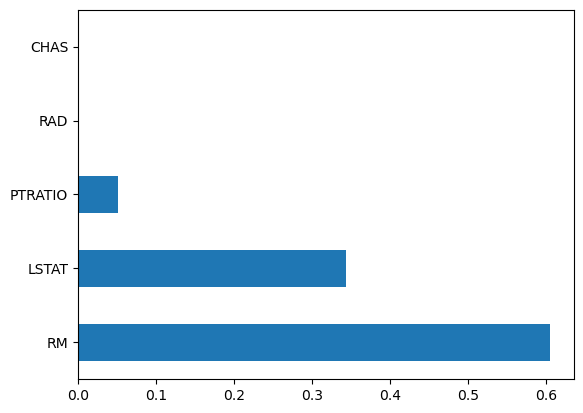

In [54]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=3, criterion='squared_error')
# Good Range of hyper parameter Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DTree=RegModel.fit(X_train,y_train)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DTree.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
prediction=DTree.predict(X_test)
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=5, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting a Decision Tree

In [55]:
# Adding graphviz path to the PATH env variable
# Try to find "dot.exe" in your system and provide the path of that folder
import os
os.environ["PATH"] += os.pathsep + 'c:\\users\\hp\\anaconda3\\lib'

In [56]:
np.var(y_train)

71.44977951738005

In [57]:
np.mean(y_train)

22.33135593220339

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="RM <= 6.945\nsquared_error = 71.45\nsamples = 354\nvalue = 22.331"] ;
1 [label="LSTAT <= 14.395\nsquared_error = 35.381\nsamples = 303\nvalue = 19.958"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="LSTAT <= 9.645\nsquared_error = 21.662\nsamples = 188\nvalue = 23.024"] ;
1 -> 2 ;
3 [label="squared_error = 26.133\nsamples = 103\nvalue = 25.084"] ;
2 -> 3 ;
4 [label="squared_error = 4.871\nsamples = 85\nvalue = 20.528"] ;
2 -> 4 ;
5 [label="PTRATIO <= 19.45\nsquared_error = 17.318\nsamples = 115\nvalue = 14.946"] ;
1 -> 5 ;
6 [label="squared_error = 9.662\nsamples = 30\nvalue = 18.823"] ;
5 -> 6 ;
7 [label="squared_error = 12.842\nsamples = 85\nvalue = 13.578"] ;
5 -> 7 ;
8 [label="LSTAT <= 4.505\nsquared_error = 53.53\nsamples = 51\nvalue = 36.429"] ;
0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
9 [label="RM <= 7.378\nsquared_error = 34.371\nsam

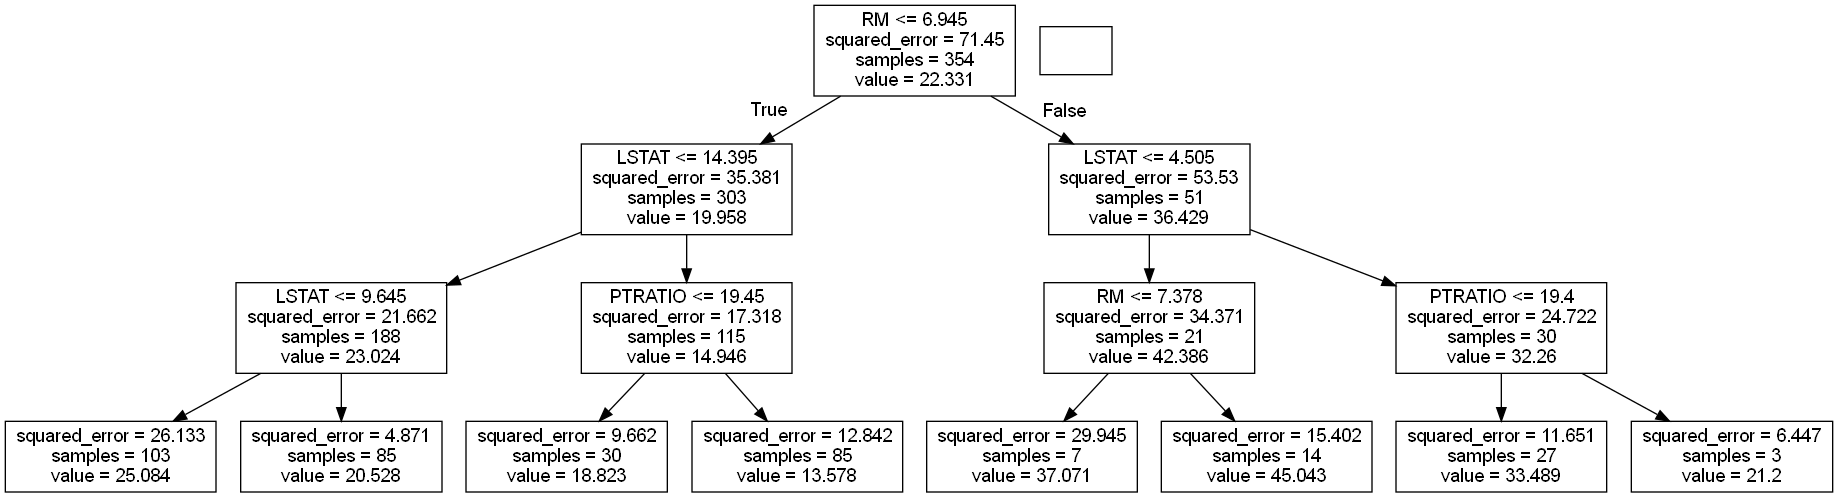

In [58]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None, 
                                feature_names=Predictors, class_names=TargetVariable)
# printing the rules
print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=1200,height=900)
# Double click on the graph to zoom in

In [59]:
# Saving the figure in current working directory
import matplotlib.pyplot as plt
currentFig=plt.gcf()
currentFig.savefig('DecisionTree.JPEG')

<Figure size 640x480 with 0 Axes>